In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for feature (x) and return (y)
time = np.arange(1, 101)  # 100 time points
x = np.random.uniform(1, 10, size=100)  # Random feature values
low_volatility = 0.5
high_volatility = 2.0

# Generate returns with low and high volatility (standard deviation)
y_low_vol = 2 * x + np.random.normal(0, low_volatility, size=100)  # y with low noise
y_high_vol = 2 * x + np.random.normal(0, high_volatility, size=100)  # y with high noise


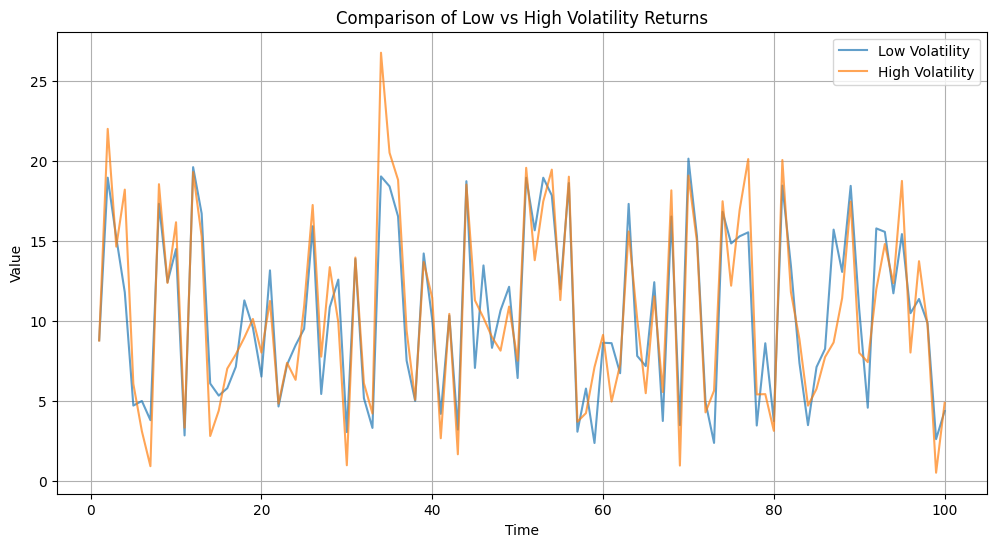

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(time, y_low_vol, label='Low Volatility', alpha=0.7)
plt.plot(time, y_high_vol, label='High Volatility', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison of Low vs High Volatility Returns')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Calculate correlation in low and high volatility cases
correlation_low_vol = np.corrcoef(x, y_low_vol)[0, 1]
correlation_high_vol = np.corrcoef(x, y_high_vol)[0, 1]

In [5]:
# Z-score filtering
# Z-scores measure how many standard deviations a data point is from the mean
# For each value in x, we calculate: z = (x - mean(x)) / std(x)
# - Positive z-scores indicate values above the mean
# - Negative z-scores indicate values below the mean
# - |z| > 1 means the value is more than 1 standard deviation from mean
# - |z| > 2 means the value is more than 2 standard deviations from mean
# This helps identify outliers and extreme values in the data
z_scores = zscore(x)
z_scores

array([-0.32311215,  1.62343393,  0.88450935,  0.43404902, -1.06136481,
       -1.0614463 , -1.39222838,  1.33783032,  0.44234815,  0.80369344,
       -1.51891535,  1.68828413,  1.22386509, -0.87109182, -0.97418076,
       -0.96884443, -0.5606064 ,  0.18437843, -0.12917552, -0.60456985,
        0.478625  , -1.11719211, -0.6014769 , -0.35074163, -0.04767177,
        1.06417941, -0.91388034,  0.14883094,  0.41295459, -1.43152996,
        0.46407071, -1.01235951, -1.36868776,  1.61725561,  1.67383195,
        1.14263051, -0.55935124, -1.25848264,  0.72315394, -0.1014474 ,
       -1.17616417,  0.08444702, -1.47227984,  1.48358882, -0.71419604,
        0.6498064 , -0.53537371,  0.16853911,  0.25854728, -0.96394594,
        1.68718539,  1.03024969,  1.58554395,  1.43462551,  0.43148649,
        1.52600067, -1.28949503, -0.92634974, -1.43566216, -0.48936243,
       -0.27535116, -0.67173278,  1.21134768, -0.38320303, -0.63934921,
        0.24498572, -1.11235977,  1.1216832 , -1.33659618,  1.74

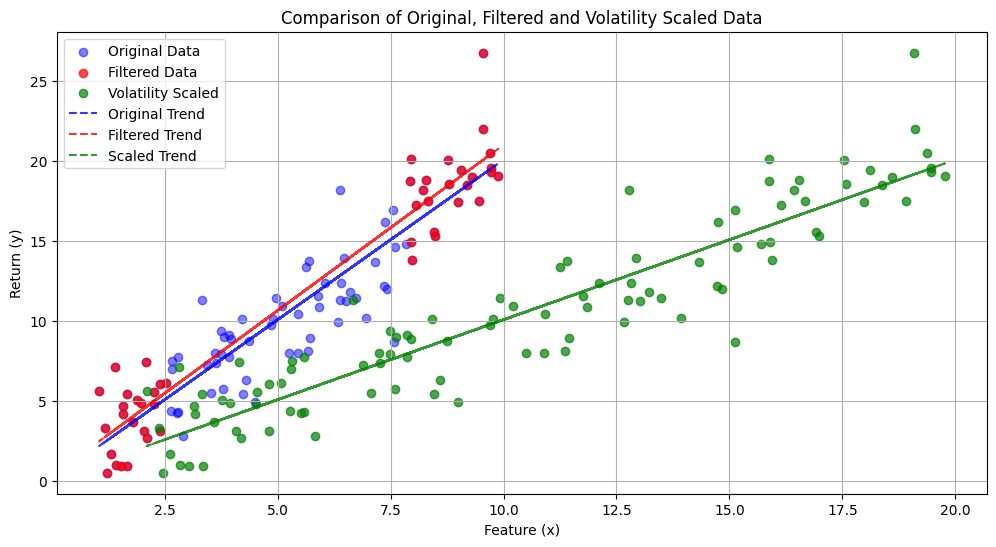

In [9]:
# Filter data based on Z-scores
threshold = 1.0  # Z-score threshold
x_filtered = x[np.abs(z_scores) > threshold]
y_filtered = y_high_vol[np.abs(z_scores) > threshold]
# Correlation after filtering by Z-score
correlation_filtered = np.corrcoef(x_filtered, y_filtered)[0, 1]

# Scaling x by volatility (using high_volatility as a proxy for Parkinson volatility)
x_scaled = x * high_volatility
correlation_scaled = np.corrcoef(x_scaled, y_high_vol)[0, 1]

# Plot comparison of original, scaled and filtered data
plt.figure(figsize=(12, 6))
plt.scatter(x, y_high_vol, alpha=0.5, label='Original Data', color='blue')
plt.scatter(x_filtered, y_filtered, alpha=0.7, label='Filtered Data', color='red')
plt.scatter(x_scaled, y_high_vol, alpha=0.7, label='Volatility Scaled', color='green')

# Add trend lines
z1 = np.polyfit(x, y_high_vol, 1)
p1 = np.poly1d(z1)
plt.plot(x, p1(x), "b--", alpha=0.8, label='Original Trend')

z2 = np.polyfit(x_filtered, y_filtered, 1)
p2 = np.poly1d(z2)
plt.plot(x_filtered, p2(x_filtered), "r--", alpha=0.8, label='Filtered Trend')

z3 = np.polyfit(x_scaled, y_high_vol, 1)
p3 = np.poly1d(z3)
plt.plot(x_scaled, p3(x_scaled), "g--", alpha=0.8, label='Scaled Trend')

plt.xlabel('Feature (x)')
plt.ylabel('Return (y)')
plt.title('Comparison of Original, Filtered and Volatility Scaled Data')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Results in a DataFrame for clear comparison
results = pd.DataFrame({
    "Case": [
        "Low Volatility",
        "High Volatility",
        "Filtered by Z-score",
        "Scaled by Volatility"
    ],
    "Correlation": [
        correlation_low_vol,
        correlation_high_vol,
        correlation_filtered,
        correlation_scaled
    ]
})

results

,Case,Correlation
0,Low Volatility,0.996376
1,High Volatility,0.925444
2,Filtered by Z-score,0.964343
3,Scaled by Volatility,0.925444
